Populating the interactive namespace from numpy and matplotlib
starting first pass
starting second pass


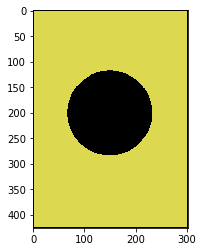

In [79]:
from PIL import Image, ImageOps
%pylab inline

import sys
import random
import numpy


def colourize(img):
    height, width = img.shape

    colors = []
    colors.append([])
    colors.append([])
    color = 1
    # Displaying distinct components with distinct colors
    coloured_img = Image.new("RGB", (width, height))
    coloured_data = coloured_img.load()

    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j] > 0:
                if img[i][j] not in colors[0]:
                    colors[0].append(img[i][j])
                    colors[1].append((random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))

                ind = colors[0].index(img[i][j])
                coloured_data[j, i] = colors[1][ind]

    return coloured_img


def binarize(img_array, threshold=130):
    for i in range(len(img_array)):
        for j in range(len(img_array[0])):
            if img_array[i][j] > threshold:
                img_array[i][j] = 0
            else:
                img_array[i][j] = 1
    return img_array


def ccl4(img_array):
    ##### first pass #####
    print ("starting first pass")
    curr_label = 1;
    img_array = numpy.array(img_array)
    labels = numpy.array(img_array)

    # storing label conversions
    label_conv = []
    label_conv.append([])
    label_conv.append([])

    count = 0
    for i in range(1, len(img_array)):
        for j in range(1, len(img_array[0])):

            if img_array[i][j] > 0:
                label_x = labels[i][j - 1]
                label_y = labels[i - 1][j]

                if label_x > 0:
                    # both x and y have a label
                    if label_y > 0:

                        if not label_x == label_y:
                            labels[i][j] = min(label_x, label_y)
                            if max(label_x, label_y) not in label_conv[0]:
                                label_conv[0].append(max(label_x, label_y))
                                label_conv[1].append(min(label_x, label_y))
                            elif max(label_x, label_y) in label_conv[0]:
                                ind = label_conv[0].index(max(label_x, label_y))
                                if label_conv[1][ind] > min(label_x, label_y):
                                    l = label_conv[1][ind]
                                    label_conv[1][ind] = min(label_x, label_y)
                                    while l in label_conv[0] and count < 100:
                                        count += 1
                                        ind = label_conv[0].index(l)
                                        l = label_conv[1][ind]
                                        label_conv[1][ind] = min(label_x, label_y)

                                    label_conv[0].append(l)
                                    label_conv[1].append(min(label_x, label_y))

                        else:
                            labels[i][j] = label_y
                    # only x has a label
                    else:
                        labels[i][j] = label_x

                # only y has a label
                elif label_y > 0:
                    labels[i][j] = label_y

                # neither x nor y has a label
                else:
                    labels[i][j] = curr_label
                    curr_label += 1

                    ##### second pass #####
    print ("starting second pass")
    count = 1
    for idx, val in enumerate(label_conv[0]):

        if label_conv[1][idx] in label_conv[0] and count < 100:
            count += 1
            ind = label_conv[0].index(label_conv[1][idx])
            label_conv[1][idx] = label_conv[1][ind]

    for i in range(1, len(labels)):
        for j in range(1, len(labels[0])):

            if labels[i][j] in label_conv[0]:
                ind = label_conv[0].index(labels[i][j])
                labels[i][j] = label_conv[1][ind]

    return labels


def main():
    numpy.set_printoptions(threshold=sys.maxsize)
    # Open the image
    img = Image.open("round.png")

    # Threshold the image
    img = img.convert('L')
    img = ImageOps.expand(img, border=1, fill='white')
    img = numpy.array(img)
    img = binarize(img)

    

    img = ccl4(img)

    # Colour the image using labels
    coloured_img = colourize(img)

    # Show the coloured image
    plt.imshow(coloured_img)
    plt.show()
    #coloured_img.show()
    


if __name__ == "__main__": main()